<a href="https://colab.research.google.com/github/sBx99/personal-data-analytics/blob/master/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [Seaborn](https://seaborn.pydata.org/api.html)
* [Spotify - Get Audio Features](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Data Visualization

[Video Tutorial](https://www.youtube.com/watch?v=v_sPnwoT_iA)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
music = pd.read_csv('data.csv')
music.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
music = music.drop('Unnamed: 0', axis=1)
music.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
music.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
train, test = train_test_split(music, test_size=0.15)
print('Training Size: {}, Testing Size: {}'.format(len(train), len(test)))

Training Size: 1714, Testing Size: 303


In [ ]:
train.shape, test.shape

((1714, 16), (303, 16))

In [ ]:
cols = music.columns
cols

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [ ]:
# PROPERTIES

# acousticness
pos_acous = music[music['target'] == 1]['acousticness']
neg_acous = music[music['target'] == 0]['acousticness']

# danceability
pos_dance = music[music['target'] == 1]['danceability']
neg_dance = music[music['target'] == 0]['danceability']

# duration (in milliseconds)
pos_time = music[music['target'] == 1]['duration_ms']
neg_time = music[music['target'] == 0]['duration_ms']

# energy
pos_energy = music[music['target'] == 1]['energy']
neg_energy = music[music['target'] == 0]['energy']

# instrumentalness
pos_inst = music[music['target'] == 1]['instrumentalness']
neg_inst = music[music['target'] == 0]['instrumentalness']

# key
pos_key = music[music['target'] == 1]['key']
neg_key = music[music['target'] == 0]['key']

# liveness
pos_live = music[music['target'] == 1]['liveness']
neg_live = music[music['target'] == 0]['liveness']

# loudness
pos_loud = music[music['target'] == 1]['loudness']
neg_loud = music[music['target'] == 0]['loudness']

# mode
pos_mode = music[music['target'] == 1]['mode']
neg_mode = music[music['target'] == 0]['mode']

# speechiness
pos_sp = music[music['target'] == 1]['speechiness']
neg_sp = music[music['target'] == 0]['speechiness']

# tempo
pos_tempo = music[music['target'] == 1]['tempo']
neg_tempo = music[music['target'] == 0]['tempo']

# time_signature
pos_sign = music[music['target'] == 1]['time_signature']
neg_sign = music[music['target'] == 0]['time_signature']

# valence
pos_val = music[music['target'] == 1]['valence']
neg_val = music[music['target'] == 0]['valence']

In [ ]:
# custom color palette
my_palette = ['#4cc9f0', '#f72585']
palette = sns.color_palette(my_palette)
sns.set(font_scale=1)
sns.set_palette(palette)
sns.set_style('white',
              {'font.family': ['monospace'],
               'grid.color': '.5',
               'grid.linestyle': '--'})

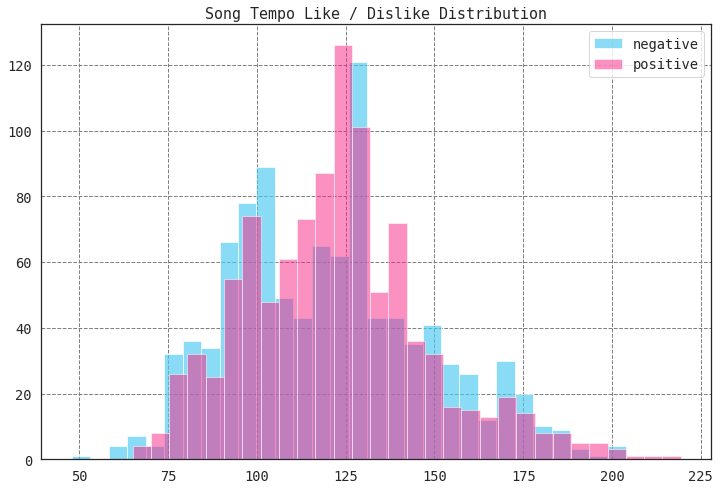

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.title('Song Tempo Like / Dislike Distribution')
neg_tempo.hist(alpha=0.65, bins=30, label='negative')
pos_tempo.hist(alpha=0.5, bins=30, label='positive')
plt.legend(loc='upper right')
plt.show()

Song Property Like / Dislike Distribution




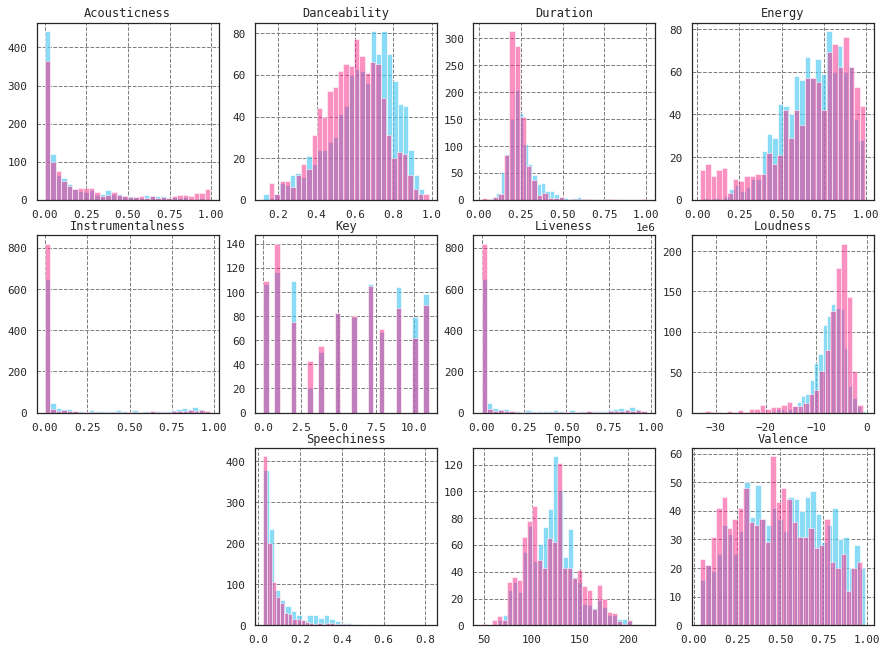

In [ ]:
fig = plt.figure(figsize=(15, 15))
print('Song Property Like / Dislike Distribution\n\n')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# acousticness
ax1 = fig.add_subplot(4, 4, 1)
# ax1.set_xlabel('Acousticness')
# ax1.set_ylabel('Count')
ax1.set_title('Acousticness')
pos_acous.hist(alpha=0.65, bins=30)
ax2 = fig.add_subplot(4, 4, 1)
neg_acous.hist(alpha=0.50, bins=30)

# danceability
ax3 = fig.add_subplot(4, 4, 2)
ax3.set_title('Danceability')
pos_dance.hist(alpha=0.65, bins=30)
ax4 = fig.add_subplot(4, 4, 2)
neg_dance.hist(alpha=0.50, bins=30)

# duration (in ms)
ax5 = fig.add_subplot(4, 4, 3)
ax5.set_title('Duration')
pos_time.hist(alpha=0.65, bins=30)
ax6 = fig.add_subplot(4, 4, 3)
neg_time.hist(alpha=0.50, bins=30)

# energy
ax7 = fig.add_subplot(4, 4, 4)
ax7.set_title('Energy')
pos_energy.hist(alpha=0.65, bins=30)
ax8 = fig.add_subplot(4, 4, 4)
neg_energy.hist(alpha=0.50, bins=30)

# instrumentalness
ax9 = fig.add_subplot(4, 4, 5)
ax9.set_title('Instrumentalness')
pos_inst.hist(alpha=0.65, bins=30)
ax10 = fig.add_subplot(4, 4, 5)
neg_inst.hist(alpha=0.50, bins=30)

# key 
ax11 = fig.add_subplot(4, 4, 6)
ax11.set_title('Key')
pos_key.hist(alpha=0.65, bins=30)
ax12 = fig.add_subplot(4, 4, 6)
neg_key.hist(alpha=0.50, bins=30)

# liveness
ax13 = fig.add_subplot(4, 4, 7)
ax13.set_title('Liveness')
pos_inst.hist(alpha=0.65, bins=30)
ax14 = fig.add_subplot(4, 4, 7)
neg_inst.hist(alpha=0.50, bins=30)

# loudness
ax15 = fig.add_subplot(4, 4, 8)
ax15.set_title('Loudness')
pos_loud.hist(alpha=0.65, bins=30)
ax16 = fig.add_subplot(4, 4, 8)
neg_loud.hist(alpha=0.50, bins=30)

'''# mode
ax17 = fig.add_subplot(4, 4, 9)
ax17.set_title('Mode')
pos_mode.hist(alpha=0.65, bins=30)
ax18 = fig.add_subplot(4, 4, 9)
neg_mode.hist(alpha=0.50, bins=30)'''

# speechiness
ax19 = fig.add_subplot(4, 4, 10)
ax19.set_title('Speechiness')
pos_sp.hist(alpha=0.65, bins=30)
ax20 = fig.add_subplot(4, 4, 10)
neg_sp.hist(alpha=0.50, bins=30)

# tempo
ax21 = fig.add_subplot(4, 4, 11)
ax21.set_title('Tempo')
pos_tempo.hist(alpha=0.65, bins=30)
ax22 = fig.add_subplot(4, 4, 11)
neg_tempo.hist(alpha=0.50, bins=30)

'''# time signature
ax23 = fig.add_subplot(4, 4, 12)
ax23.set_title('Time Signature')
pos_sign.hist(alpha=0.65, bins=30)
ax24 = fig.add_subplot(4, 4, 12)
neg_sign.hist(alpha=0.50, bins=30)'''

# valence
ax25 = fig.add_subplot(4, 4, 12)
ax25.set_title('Valence')
pos_val.hist(alpha=0.65, bins=30)
ax26 = fig.add_subplot(4, 4, 12)
neg_val.hist(alpha=0.50, bins=30)

plt.show()

## 2. Decision Trees

[Video Tutorial](https://www.youtube.com/watch?v=XDbj6PxaSf0)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import io
from imageio import imread

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=100)

In [ ]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness',
            'speechiness', 'tempo', 'valence']
features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [ ]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [ ]:
decTree = classifier.fit(X_train, y_train)

In [ ]:
def showTree(tree, features, path):
  f = io.StringIO()
  export_graphviz(tree, out_file=f, feature_names=features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = imread(path)
  plt.rcParams['figure.figsize'] = (15, 15)
  plt.imshow(img)

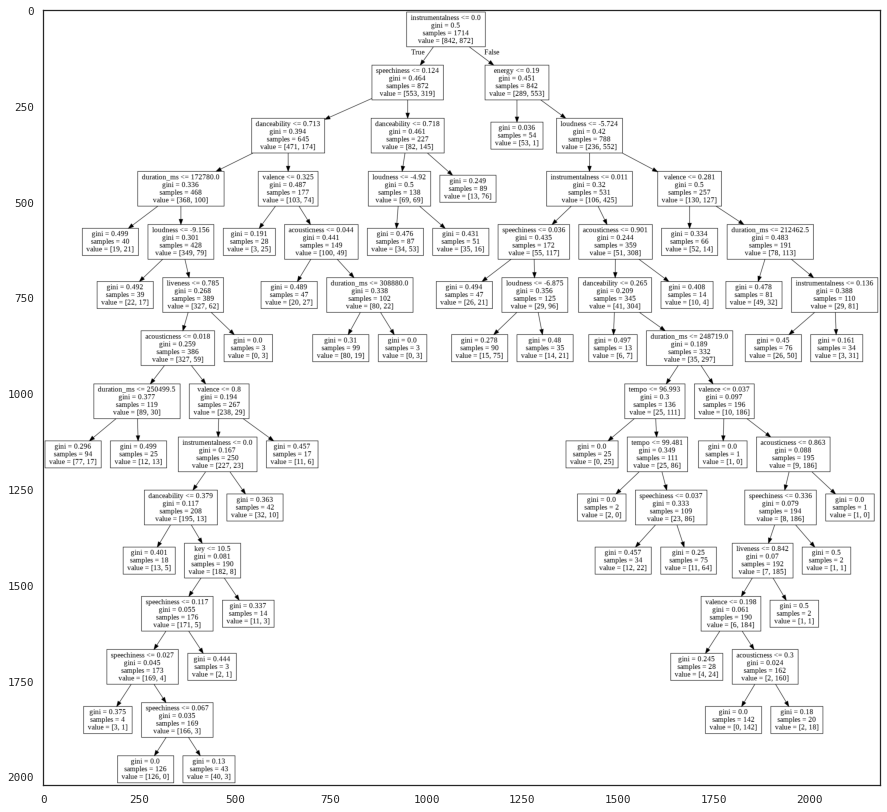

In [ ]:
showTree(decTree, features, 'decTree1.png')

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print('Accuracy after using a Decision Tree: ', score, '%')

Accuracy after using a Decision Tree:  69.63696369636963 %
